# ORIE 4580:  Pseudorandom generators

### Sid Banerjee, Operations Research @ Cornell, 2023

---



---

Notebook demonstrating basics of confidence intervals

In [2]:
# Preamble to make sure we have all packages we need
import numpy as np
from scipy import stats

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

Function for adding (fixed-sample) confidence intervals to your histograms in Python

In [9]:
def plot_mean_and_ci(fig, data, alpha=0.95, plotCI=1):
    """
    Plot the mean and confidence interval (CI) for a dataset.

    Parameters:
    fig (matplotlib.figure.Figure): The figure object to draw on.
    data (numpy.ndarray): The dataset for which to calculate the mean and CI.
    alpha (float): The confidence level (e.g., 0.95 for a 95% CI).
    plotCI (int): Whether to plot the confidence interval (1 for yes, 0 for no).

    Returns:
    tuple: A tuple containing the mean and half-width of the CI.
    """
    mean = np.mean(data)

    # Calculate the z-score for the given confidence level alpha
    z = stats.norm.ppf(0.5 + alpha / 2.0)

    # Calculate the half-width of the CI
    half_width_alpha = z * np.std(data, ddof=1) / np.sqrt(len(data))

    # Calculate the upper and lower bounds of the CI
    ucb = mean + half_width_alpha
    lcb = mean - half_width_alpha

    # Plot the sample mean as a green vertical line
    plt.axvline(mean, color='g', label='sample mean', lw=2)

    # Plot the confidence interval as a yellow shaded region
    if plotCI:
        plt.axvspan(lcb, ucb, alpha=0.5, color='y', label=f'{int(alpha*100)}% confidence interval')

    return mean, half_width_alpha

Let us try this for the food bank volunteers example in class (to understand the relation between $\mathbb{E}\left[\frac{Y}{X}\right]$ and $\frac{\mathbb{E}[Y]}{\mathbb{E}[X]}$)

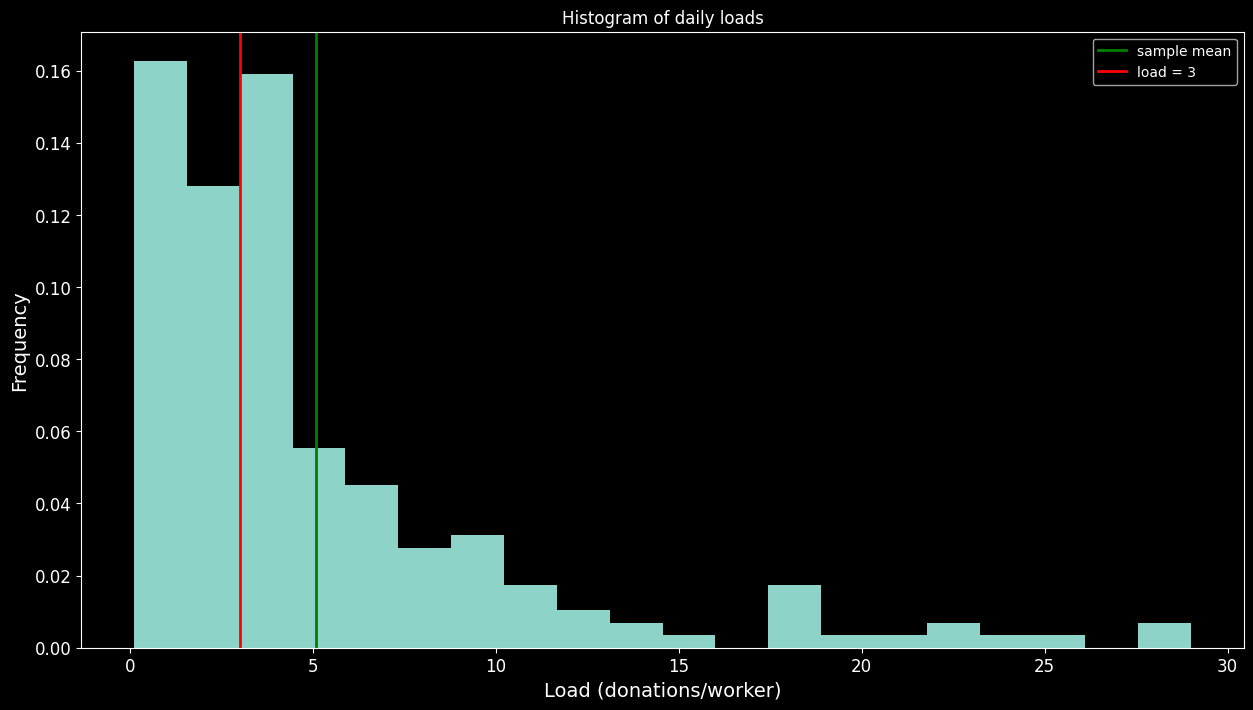

In [10]:
np.random.seed(10)

num_samples = 200
n = np.arange(1,num_samples+1)

max_workers = 9
max_donations = 29
load = np.array([])

for i in n:
    workers = np.random.randint(low = 1,high = max_workers+1)
    donations = np.random.randint(low = 1,high = max_donations+1)
    load = np.append(load,donations/workers)

# Need to pass the plot to the confidence interval plotter
fig = plt.figure(figsize=(15,8))

plt.hist(load,density=True,bins='auto')

mean,half_width_alpha = plot_mean_and_ci(fig,load,plotCI=0)

# Plotting E[Y]/E[X]
plt.axvline((max_donations+1)/(max_workers+1),color = 'r',alpha=1,lw = 2,label='load = 3')

#plt.grid(True)
plt.xlabel('Load (donations/worker)')
plt.ylabel('Frequency')
plt.title('Histogram of daily loads')
plt.legend(loc=1)
plt.show()

Adding confidence intervals to the plot

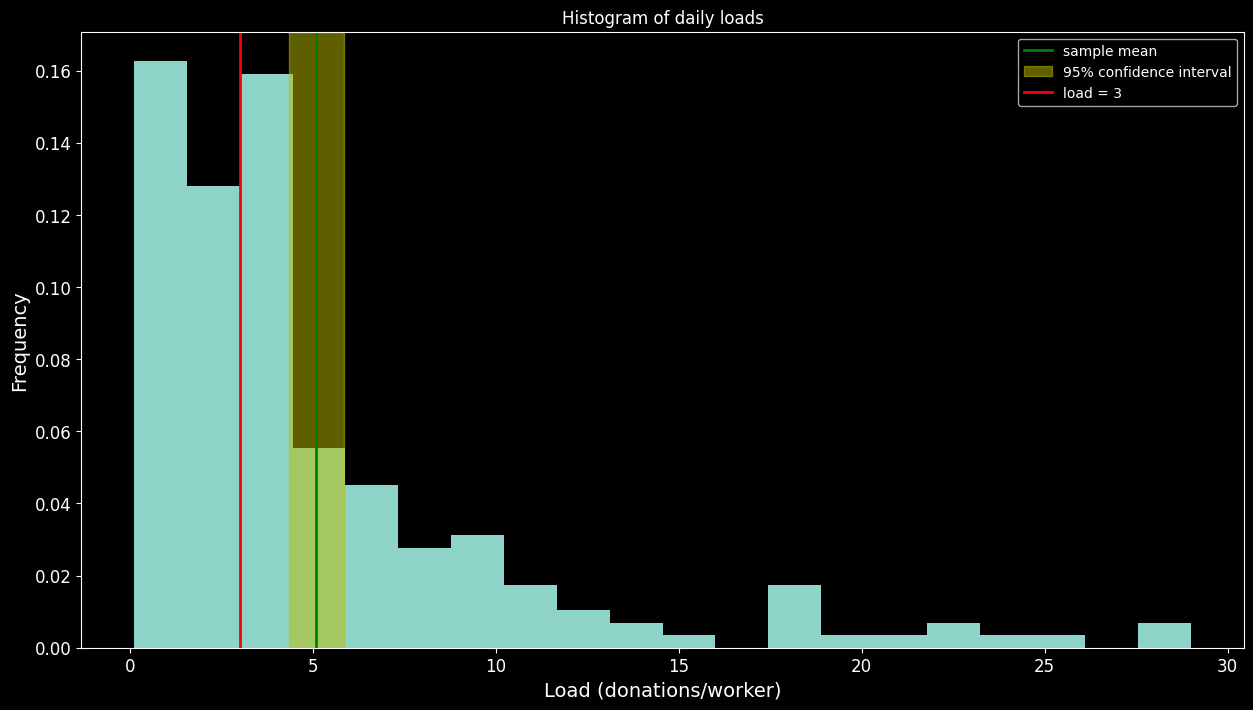

In [4]:
fig = plt.figure(figsize=(15,8))
plt.hist(load,density=True,bins='auto')
mean,half_width_alpha = plot_mean_and_ci(fig,load,plotCI=1)
plt.axvline((max_donations+1)/(max_workers+1),color = 'r',alpha=1,lw = 2,label='load = 3')

#plt.grid(True)
plt.xlabel('Load (donations/worker)')
plt.ylabel('Frequency')
plt.title('Histogram of daily loads')
plt.legend(loc=1)
plt.show()

We can also compute the sample mean to get:

In [6]:
print( "mean estimate = {0:.2f}".format(mean) + ' ± ' + "{0:.2f}".format(half_width_alpha))

mean estimate = 5.09 ± 0.75


Note that this is greater than $\frac{\mathbb{E}[Y]}{\mathbb{E}[X]} = \frac{30}{10} = 3$

This is what Jensen's inequality predicts as well, since $\mathbb{E}\left[\frac{Y}{X}\right] = \mathbb{E}[Y]\cdot\mathbb{E}\left[\frac{1}{X}\right] \geq \frac{\mathbb{E}[Y]}{\mathbb{E}[X]}$